In [63]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np 

In [64]:
class ThresholdSwitch():
    def __init__(self,  R_off: float = 10_000_000_000, R_on: float = 10_000, V_th: float = 0.3, V_hold: float = 0.05) -> None:
        self.R_off = R_off 
        self.R_on = R_on
        self.V_th = V_th
        self.V_hold = V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if (self.state == 'off') and ((voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and ((voltage) > self.V_th):
            self.state = 'on'
            return self.R_on
        elif (self.state == 'on') and ((voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and ((voltage) < self.V_hold):
            self.state = 'off'
            return self.R_off

In [65]:
time = np.linspace(0, 10, 1_000_000)
dt = time[1] - time[0]
ts = ThresholdSwitch(V_hold=0.1, V_th=0.5, R_off=5e10, R_on=3e4)

E = 2
R_r = 1e6
C = 1e-10
R_ts = [ts.get_resistance(0)]
U_ts = [0]
I_ts = [0]
I_C = [0]
I = [0]
U_r = [0]

for i in range(1, len(time)):
    I.append(E / (R_r + R_ts[i-1]))
    U_ts.append((I[i-1] - U_ts[i-1] / R_ts[i-1]) * dt/C + U_ts[i-1])
    R_ts.append(ts.get_resistance(U_ts[i]))
    I_ts.append(U_ts[i] / R_ts[i])
    U_r.append(E - U_ts[i-1])


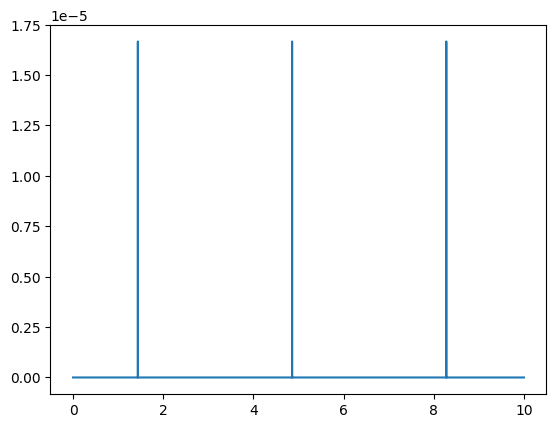

In [69]:
plt.plot(time, I_ts)
#plt.xlim([0.256,0.257])
#plt.yscale('log')